<a href="https://colab.research.google.com/github/galloeileen/Final_Project_2021_Python/blob/main/FinalProject_2021_Eileen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

README.md

**LAPD calls for service** 

LAPD publishes the calls for service, this dataframe allows someone to find out what areas in Los angeles have a higher call volume. Los Angeles county is very big and if you are planning on moving into a different city then it would be very informational to look at this type of data when making a big relocation decision, as it can impact your everyday life.

In [55]:
#Import Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('Import sucessful')

Import sucessful


In [56]:
#Load csv data
lapd_calls = pd.read_csv('https://raw.githubusercontent.com/galloeileen/Final_Project_2021_Python/main/LAPD_Calls_for_Service_2020.csv')



print('data loaded successfully')

data loaded successfully


In [57]:
#Make a copy of the csv - OPTIONAL
crime_data = lapd_calls.copy()

In [58]:
#Drop unnecessary columns
crime_data.drop(columns=['Rpt_Dist', 'Incident_Number', 'Dispatch_Time'], inplace=True)

#Confirm dropped columns
crime_data.head()


,Area_Occ,Dispatch_Date,Call_Type_Code,Call_Type_Text
0,Van Nuys,3/24/2020 0:00,6,CODE 6
1,Central,3/28/2020 0:00,242DS,DOM VIOL SUSP
2,Outside,3/25/2020 0:00,6,CODE 6
3,Outside,3/25/2020 0:00,6,CODE 6
4,Hollywood,3/23/2020 0:00,9212,TRESPASS SUSP


In [59]:
#Rename colums
crime_data.rename(columns={'Area_Occ': 'Los Angeles Area', 'Call_Type_Code': 'Call-type', 'Call_Type_Text': 'Call-Code Description', 'Dispatch_Date': 'Date of Incident'}, inplace=True)
crime_data.head()

,Los Angeles Area,Date of Incident,Call-type,Call-Code Description
0,Van Nuys,3/24/2020 0:00,6,CODE 6
1,Central,3/28/2020 0:00,242DS,DOM VIOL SUSP
2,Outside,3/25/2020 0:00,6,CODE 6
3,Outside,3/25/2020 0:00,6,CODE 6
4,Hollywood,3/23/2020 0:00,9212,TRESPASS SUSP


In [60]:
#Delete all of the CODE 6 from CSV
code_description = crime_data[~crime_data['Call-Code Description'].str.contains('CODE 6')]

code_description

,Los Angeles Area,Date of Incident,Call-type,Call-Code Description
1,Central,3/28/2020 0:00,242DS,DOM VIOL SUSP
4,Hollywood,3/23/2020 0:00,9212,TRESPASS SUSP
6,West LA,3/28/2020 0:00,507A,AUTO REPAIR
8,Outside,3/26/2020 0:00,902,TRAFFIC STOP
9,Wilshire,3/28/2020 0:00,415G,GRP
...,...,...,...,...
989,Olympic,3/23/2020 0:00,902,TRAFFIC STOP
990,Harbor,3/22/2020 0:00,415F,FIGHT
991,Topanga,3/28/2020 0:00,9282,ADULT
993,Van Nuys,3/22/2020 0:00,507P,PARTY


In [61]:
#Delete Los Angeles Area that categorizes as "Outside" 
code_description = crime_data[~crime_data['Los Angeles Area'].str.contains('Outside')]
code_description

,Los Angeles Area,Date of Incident,Call-type,Call-Code Description
0,Van Nuys,3/24/2020 0:00,6,CODE 6
1,Central,3/28/2020 0:00,242DS,DOM VIOL SUSP
4,Hollywood,3/23/2020 0:00,9212,TRESPASS SUSP
6,West LA,3/28/2020 0:00,507A,AUTO REPAIR
9,Wilshire,3/28/2020 0:00,415G,GRP
...,...,...,...,...
990,Harbor,3/22/2020 0:00,415F,FIGHT
991,Topanga,3/28/2020 0:00,9282,ADULT
993,Van Nuys,3/22/2020 0:00,507P,PARTY
995,Foothill,3/25/2020 0:00,6,CODE 6


In [62]:
# Group columns by Los Angeles Area + size
code_description.groupby(by=['Los Angeles Area', 'Call-Code Description']).size()
                                                                           
grouped_df = code_description.groupby('Los Angeles Area')
for key, item in grouped_df:
    print(grouped_df.get_group(key), "\n\n")


    Los Angeles Area Date of Incident Call-type Call-Code Description
147      77th Street   3/26/2020 0:00         6                CODE 6
153      77th Street   3/24/2020 0:00     447SN              SUSP NOW
159      77th Street   3/28/2020 0:00      5101                   CAR
188      77th Street   3/28/2020 0:00      415M                   MAN
253      77th Street   3/25/2020 0:00         6                CODE 6
323      77th Street   3/24/2020 0:00      415M                   MAN
364      77th Street   3/24/2020 0:00     245FJ       SHOTS FIRED J/O
401      77th Street   3/25/2020 0:00      415W                 WOMAN
444      77th Street   3/26/2020 0:00      507R                 RADIO
450      77th Street   3/21/2020 0:00     4591I            BFV INVEST
469      77th Street   3/24/2020 0:00         6                CODE 6
480      77th Street   3/27/2020 0:00      245S                  SUSP
489      77th Street   3/28/2020 0:00      620F                FAMILY
519      77th Street

In [ ]:
#Create Bar chart - Los Angeles Area call volume 

code_description['Los Angeles Area' ].value_counts().plot(kind='bar')

# Added a title to my bar chart
plt.title('LAPD Calls for Service')

# Added a label 
plt.ylabel('Number of Calls')

In [78]:
#Top 3 cities in this dataset
code_service = code_description['Los Angeles Area'].value_counts()
top_cities = code_service.head(3).index.value_counts()
top_cities



77th Street    1
Hollywood      1
Pacific        1
dtype: int64

In [65]:
#Top 3 cities in this dataset
top_cities.index.values

array(['77th Street', 'Hollywood', 'Pacific'], dtype=object)

In [79]:
#Group cities that have call-type as 415M
code_codes = code_description[code_description['Call-type'] == '415M']
code_codes.groupby('Los Angeles Area').size()

Los Angeles Area
77th Street    2
Central        4
Devonshire     1
Foothill       1
Harbor         3
Hollenbeck     1
Hollywood      1
Mission        1
Newton         4
Olympic        4
Pacific        5
Southeast      2
Southwest      3
Topanga        5
Van Nuys       1
West LA        5
West Valley    2
Wilshire       5
dtype: int64

Text(0, 0.5, 'Call type is 415')

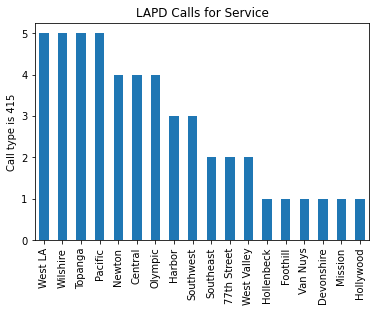

In [80]:
#Create Bar chart - Los Angeles Area call type

code_codes['Los Angeles Area' ].value_counts().plot(kind='bar')

# Added a title to my bar chart
plt.title('LAPD Calls for Service')

# Added a label 
plt.ylabel('Call type is 415')